# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [51]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
# cheaking head and info of the dataset 
penguins_df.info()
penguins_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


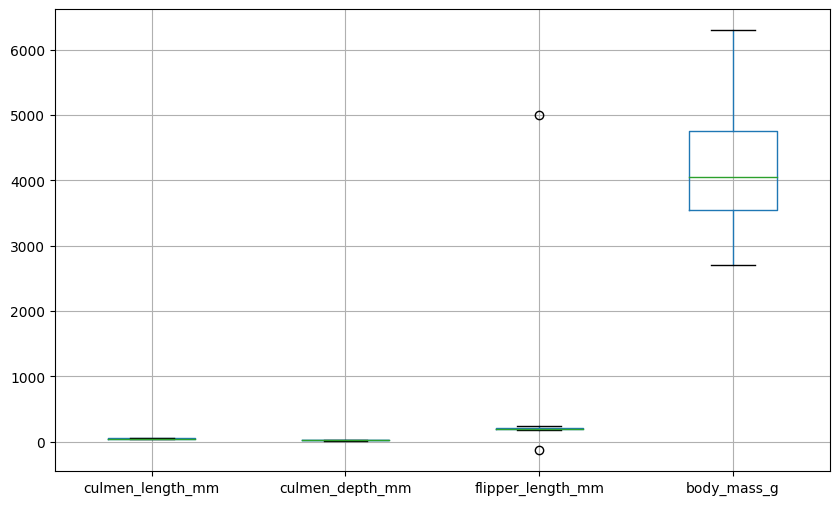

In [52]:
# Visualize and identify any outliers in the dataset using boxplot for all numerical columns
penguins_df.boxplot(figsize=(10, 6))
plt.show()

# Remove rows with missing values to clean the data
penguins_clean = penguins_df.dropna()

# Check for outliers in 'flipper_length_mm' column that are unrealistically high
penguins_clean[penguins_clean['flipper_length_mm']>4000]

# Check for outliers in 'flipper_length_mm' column that are less than 0 (unrealistic values)
penguins_clean[penguins_clean['flipper_length_mm']<0]

# Drop specific rows identified as outliers by their index (example indices 9 and 14)
penguins_clean = penguins_clean.drop([9,14])

In [53]:
# Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.', axis=1)

In [54]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data in 'df' dataframe
X = scaler.fit_transform(df)

# Convert the scaled data back to a pandas DataFrame
# This is necessary because the scaling process returns a numpy array
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)

# Display the first 10 rows of the preprocessed (scaled) dataframe
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [55]:
# Initialize PCA with no specified number of components to analyze the full dataset
pca = PCA(n_components=None)

# Fit the PCA on the preprocessed penguin data
df_pca = pca.fit(penguins_preprocessed)

# Retrieve and display the variance ratio of each component to decide how many to keep
df_pca.explained_variance_ratio_

# Determine the number of components to keep based on a threshold of explained variance (e.g., > 0.1)
n_components = sum(df_pca.explained_variance_ratio_ > 0.1)

# Initialize PCA with the determined number of components to keep
pca = PCA(n_components=n_components)

# Fit and transform the preprocessed data using PCA to reduce its dimensionality
penguins_PCA = pca.fit_transform(penguins_preprocessed)

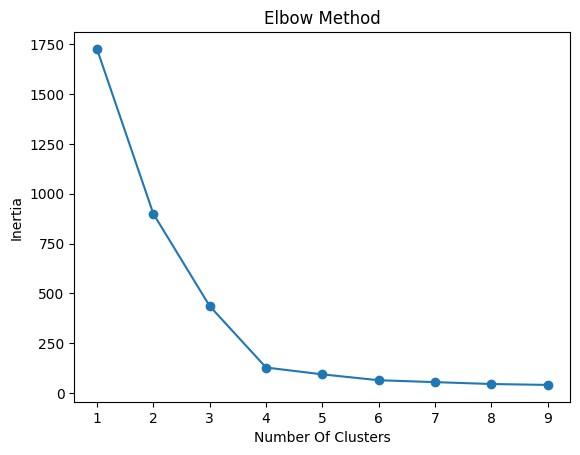

In [56]:
# Initialize an empty list to store the inertia values for different numbers of clusters
inertia = []

# Loop over a range of 1 to 9 clusters to find the optimal number
for k in range(1, 10):
    # Initialize KMeans with the current number of clusters and a fixed random state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    # Append the inertia (sum of squared distances to the nearest cluster center) to the list
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters to visualize the "elbow"
plt.plot(range(1,10), inertia, marker='o')
# Set the x-axis label as 'Number Of Clusters'
plt.xlabel('Number Of Clusters')
# Set the y-axis label as 'Inertia'
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

n_clusters = 4

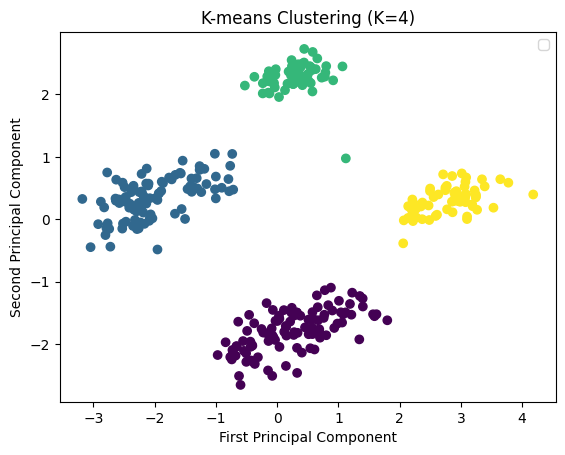

In [57]:
# Perform KMeans clustering with the optimal number of clusters determined previously
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

# Scatter plot of the data points colored by their cluster label
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')

# Label the x-axis as 'First Principal Component'
plt.xlabel('First Principal Component')
# Label the y-axis as 'Second Principal Component'
plt.ylabel('Second Principal Component')
# Set the title of the plot indicating the number of clusters used
plt.title(f'K-means Clustering (K={n_clusters})')

# Add a legend to the plot. Note: This will cause an error because scatter plots with a colormap do not automatically generate a legend.
# To correctly add a legend, you would need to manually create a legend or use another plotting approach.
plt.legend()

# Display the plot
plt.show()

In [58]:
# create a final statistical dataframe for each cluster
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm
label                                                      
0             43.878302        19.111321         194.764151
1             40.217757        17.611215         189.046729
2             45.545763        14.262712         212.779661
3             49.473770        15.718033         221.540984
